In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Create dataframe
bc_df = pd.read_csv(
    'breast-cancer-wisconsin.data',
                    names=['ID','Clump Thickness','Uniformity of Cell Size',
                         'Uniformity of Cell Shape','Marginal Adhesion',
                         'Simple Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
                         'Normal Nucleoli','Mitoses',
                        'Class (2 for benign, 4 for malignant)'], na_values=["?"])
bc_df = bc_df.drop(columns=['ID'])

#Replace missing values in dataframe with the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(bc_df)
bc_df[bc_df.columns] = imputer.fit_transform(bc_df)
bc_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Simple Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,"Class (2 for benign, 4 for malignant)"
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4.0


In [4]:

#Set-up data as samples and features
X = bc_df.drop('Class (2 for benign, 4 for malignant)', axis = 1)
y = bc_df['Class (2 for benign, 4 for malignant)']

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self, total = 569. X_train = 455/569 = 0.8 & X_test = 114/569 = 0.2
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(559, 9) (559,)
(140, 9) (140,)


[Text(167.4, 181.2, 'X[1] <= 2.5\ngini = 0.453\nsamples = 559\nvalue = [365, 194]'),
 Text(83.7, 108.72, 'X[7] <= 3.5\ngini = 0.062\nsamples = 343\nvalue = [332, 11]'),
 Text(41.85, 36.23999999999998, 'gini = 0.024\nsamples = 335\nvalue = [331, 4]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 2.5\ngini = 0.259\nsamples = 216\nvalue = [33, 183]'),
 Text(209.25, 36.23999999999998, 'gini = 0.497\nsamples = 41\nvalue = [22, 19]'),
 Text(292.95, 36.23999999999998, 'gini = 0.118\nsamples = 175\nvalue = [11, 164]')]

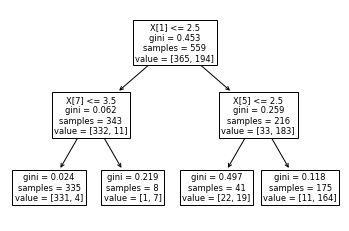

In [49]:
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [6]:
#Create functions for the following
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])


In [7]:
#Calculate gini 
gini(169/559)

0.42184964845862627

In [8]:
#Calculate classification error
classification_error(169/559)

0.3023255813953488

In [9]:
#Calculate entropy before split
entropy(169/559)

0.8841151220488479

In [10]:
#Calculate avg entropy after split
(169/559)*entropy(153/169) + (390/559)*entropy(370/390)


0.3402100266069391

In [11]:
#Calculate information gain (Entropy before split - entropy after split)
0.8841151220488479 - 0.3402100266069391

0.5439050954419088

In [50]:
#Findout the feature of the first split
#tree.plot_tree.feature_names[1]


From the above calculations, we can determine that:

The entropy of the first split is: 0.884

The gini of the first split is: 0.422

The misclassification error of the first split is: 0.302

The information gain of the first split is: 0.544

The feature that was selected for the first split is X[1],which is ('mean texture' )'cell size', which was determine throughout the training phase as the most valuable.(x[1]=2.5)
